### データロガーで測定した値を確認してみる。

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop\\支給品振動モータ使用_振動値測定'

In [5]:
#ファイル選択
df_recivedata = pd.read_csv(r"vibrationmoter_0001.CSV")

#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V]
0,'21-12-02 11:07:30.938,0.998,1.46,1.54,1.50,1.48
1,'21-12-02 11:07:30.948,0.999,1.38,1.46,1.50,1.47
2,'21-12-02 11:07:30.958,0.997,1.48,1.52,1.50,1.48
3,'21-12-02 11:07:30.968,0.997,1.42,1.49,1.49,1.47
4,'21-12-02 11:07:30.978,0.996,1.45,1.50,1.50,1.48


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V]
42636,'21-12-02 11:14:37.298,0.997,1.42,1.51,1.50,1.48
42637,'21-12-02 11:14:37.308,1.000,1.42,1.48,1.49,1.48
42638,'21-12-02 11:14:37.318,0.998,1.45,1.51,1.50,1.48
42639,'21-12-02 11:14:37.328,0.998,1.42,1.52,1.49,1.47
42640,'21-12-02 11:14:37.338,0.999,1.43,1.54,1.49,1.47


### U1-1は瞬時流量4-20mAと249.3Ωを掛けて電圧値に直したもの。
### U1-2は加速度センサ1のX軸値、U1-3は加速度センサ1のY軸値。
### U1-4は加速度センサ2のX軸値、U1-5は加速度センサ2のY軸値。　である。

In [6]:
df_recivedata.count()

Time       42641
U1-1[V]    42641
U1-2[V]    42641
U1-3[V]    42641
U1-4[V]    42641
U1-5[V]    42641
dtype: int64

### データフレームの値に欠損値は無い。
### 瞬時流量の電圧値を実際の瞬時流量値(l/h)に直してみる。

In [7]:
#dfにカラムを追加（計算値）
df_recivedata['U2-1'] = ((df_recivedata['U1-1[V]'] * 250 / 249.3) - 1) * 7200 / 4

#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,'21-12-02 11:07:30.938,0.998,1.46,1.54,1.50,1.48,1.444043
1,'21-12-02 11:07:30.948,0.999,1.38,1.46,1.50,1.47,3.249097
2,'21-12-02 11:07:30.958,0.997,1.48,1.52,1.50,1.48,-0.361011
3,'21-12-02 11:07:30.968,0.997,1.42,1.49,1.49,1.47,-0.361011
4,'21-12-02 11:07:30.978,0.996,1.45,1.50,1.50,1.48,-2.166065


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
42636,'21-12-02 11:14:37.298,0.997,1.42,1.51,1.50,1.48,-0.361011
42637,'21-12-02 11:14:37.308,1.000,1.42,1.48,1.49,1.48,5.054152
42638,'21-12-02 11:14:37.318,0.998,1.45,1.51,1.50,1.48,1.444043
42639,'21-12-02 11:14:37.328,0.998,1.42,1.52,1.49,1.47,1.444043
42640,'21-12-02 11:14:37.338,0.999,1.43,1.54,1.49,1.47,3.249097


### マイナスの瞬時流量は0にFIXする

In [8]:
df_recivedata.loc[df_recivedata['U2-1'] < 0, 'U2-1'] = 0 

In [9]:
#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,'21-12-02 11:07:30.938,0.998,1.46,1.54,1.50,1.48,1.444043
1,'21-12-02 11:07:30.948,0.999,1.38,1.46,1.50,1.47,3.249097
2,'21-12-02 11:07:30.958,0.997,1.48,1.52,1.50,1.48,0.000000
3,'21-12-02 11:07:30.968,0.997,1.42,1.49,1.49,1.47,0.000000
4,'21-12-02 11:07:30.978,0.996,1.45,1.50,1.50,1.48,0.000000


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
42636,'21-12-02 11:14:37.298,0.997,1.42,1.51,1.50,1.48,0.000000
42637,'21-12-02 11:14:37.308,1.000,1.42,1.48,1.49,1.48,5.054152
42638,'21-12-02 11:14:37.318,0.998,1.45,1.51,1.50,1.48,1.444043
42639,'21-12-02 11:14:37.328,0.998,1.42,1.52,1.49,1.47,1.444043
42640,'21-12-02 11:14:37.338,0.999,1.43,1.54,1.49,1.47,3.249097


### 必要ない列は消す。

In [10]:
df_recivedata = df_recivedata.drop(["Time", "U1-1[V]"], axis = 1)

df_recivedata

,U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,1.46,1.54,1.50,1.48,1.444043
1,1.38,1.46,1.50,1.47,3.249097
2,1.48,1.52,1.50,1.48,0.000000
3,1.42,1.49,1.49,1.47,0.000000
4,1.45,1.50,1.50,1.48,0.000000
...,...,...,...,...,...
42636,1.42,1.51,1.50,1.48,0.000000
42637,1.42,1.48,1.49,1.48,5.054152
42638,1.45,1.51,1.50,1.48,1.444043
42639,1.42,1.52,1.49,1.47,1.444043


### 散布図行列を書いてみる

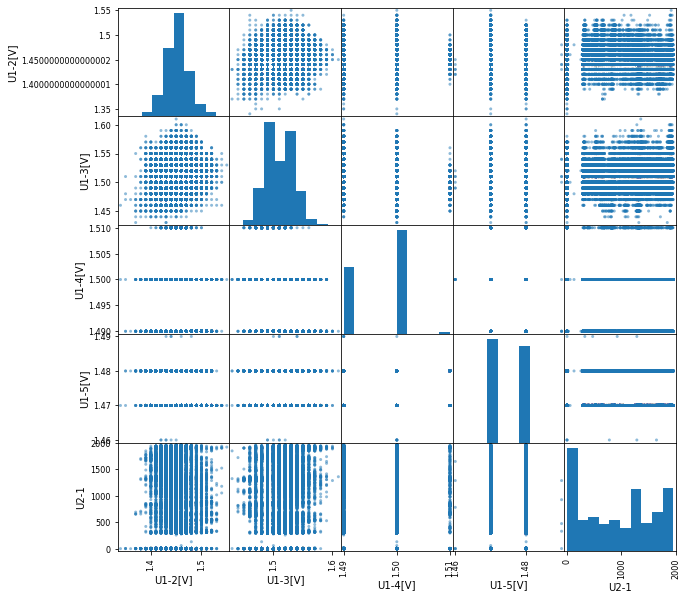

In [11]:
pd.plotting.scatter_matrix(df_recivedata, figsize=(10,10))
plt.show()

### 相関を見る。

In [12]:
df_recivedata.corr()

,U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
U1-2[V],1.000000,0.068880,0.064402,-0.073640,0.006935
U1-3[V],0.068880,1.000000,-0.258808,-0.061044,0.029252
U1-4[V],0.064402,-0.258808,1.000000,-0.342601,0.050047
U1-5[V],-0.073640,-0.061044,-0.342601,1.000000,0.088510
U2-1,0.006935,0.029252,0.050047,0.088510,1.000000


### ヒートマップにして表示する。

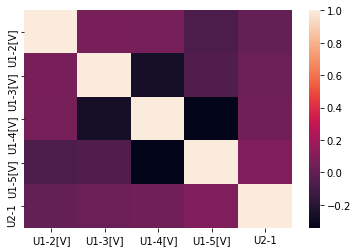

In [13]:
sns.heatmap(df_recivedata.corr())
plt.show()

### 相関が無い事が判った。